In [226]:
import pandas as pd
import numpy as np
#from sklearn import linear_model
#from sklearn import model_selection
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [227]:
dataframe = pd.read_csv(r"indicadores_H5W1_sentencebertwordnet_5_curado_CLASS.csv")
dataframe

,CLASS,Where,What,Who,When,Why,How,Additional information
0,entailment,1.000000,0.505262,1,0,0,0.0,1.0
1,entailment,1.000000,0.944161,1,1,1,1.0,1.0
2,contradiction,0.265408,0.360803,1,0,0,1.0,1.0
3,contradiction,1.000000,0.919731,0,0,0,1.0,0.0
4,neutral,0.715984,0.224679,1,0,0,0.0,1.0
...,...,...,...,...,...,...,...,...
95,entailment,1.000000,0.747842,1,0,0,0.0,1.0
96,entailment,1.000000,0.830284,1,0,0,0.0,0.0
97,contradiction,1.000000,0.086890,1,0,0,0.0,0.0
98,contradiction,1.000000,0.357685,1,0,0,0.0,0.0


In [228]:
colum=len(dataframe.columns)-1

In [229]:
colum

7

In [230]:
dataframe.describe()

,Where,What,Who,When,Why,How,Additional information
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.788650,0.452605,0.740000,0.040000,0.080000,0.195000,0.495000
std,0.306683,0.299054,0.660884,0.315268,0.418752,0.563606,0.519785
min,0.094228,0.008623,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.561895,0.205522,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.385234,1.000000,0.000000,0.000000,0.000000,0.750000
75%,1.000000,0.687030,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [231]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


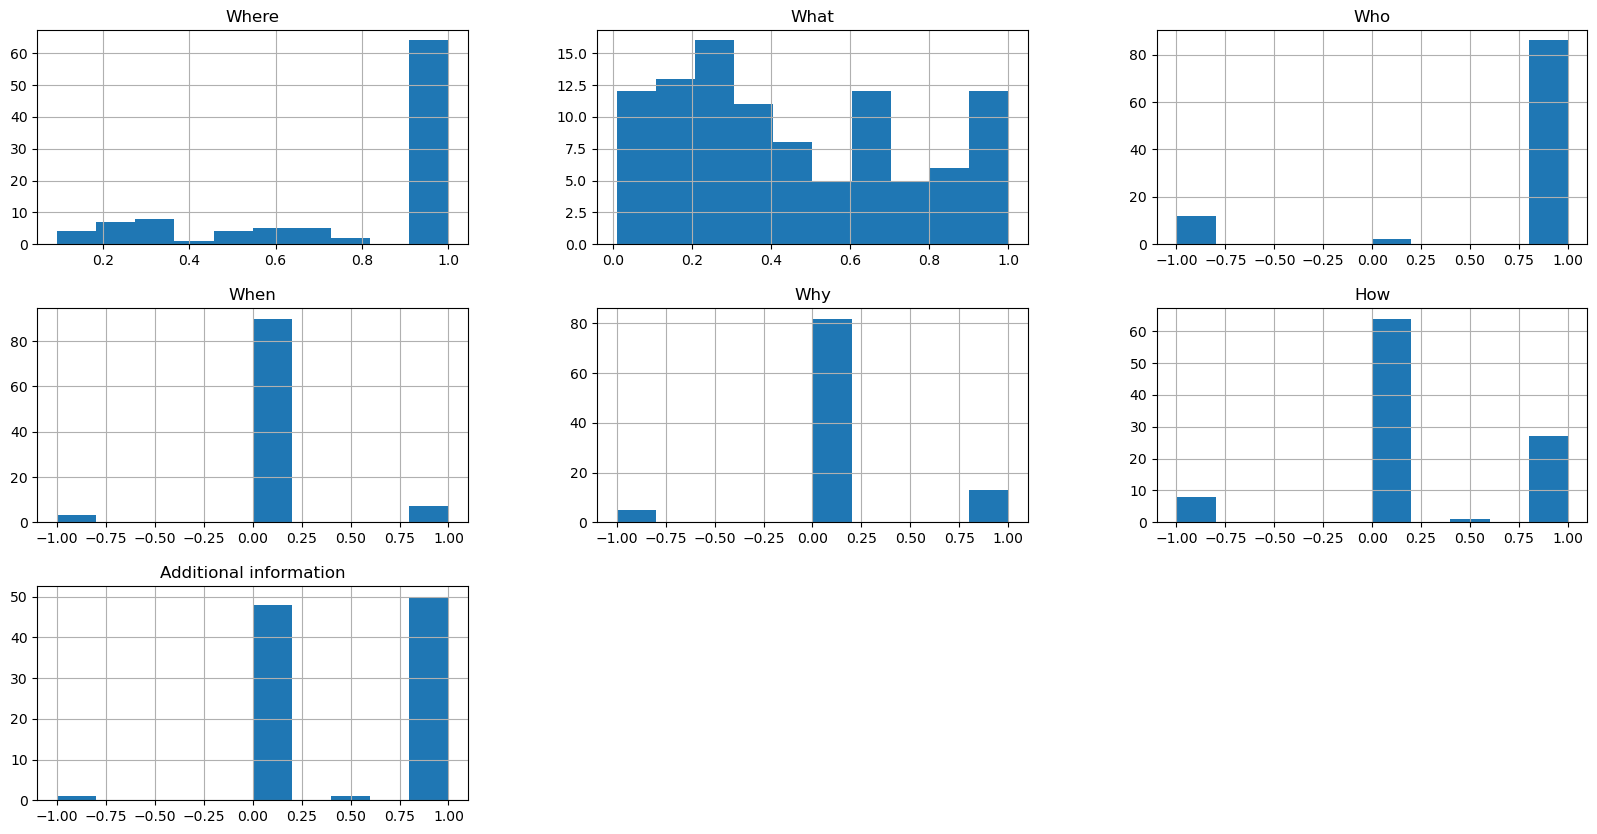

In [232]:
dataframe.hist(figsize=(20,10))
plt.show()

c:\Users\Ninja\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


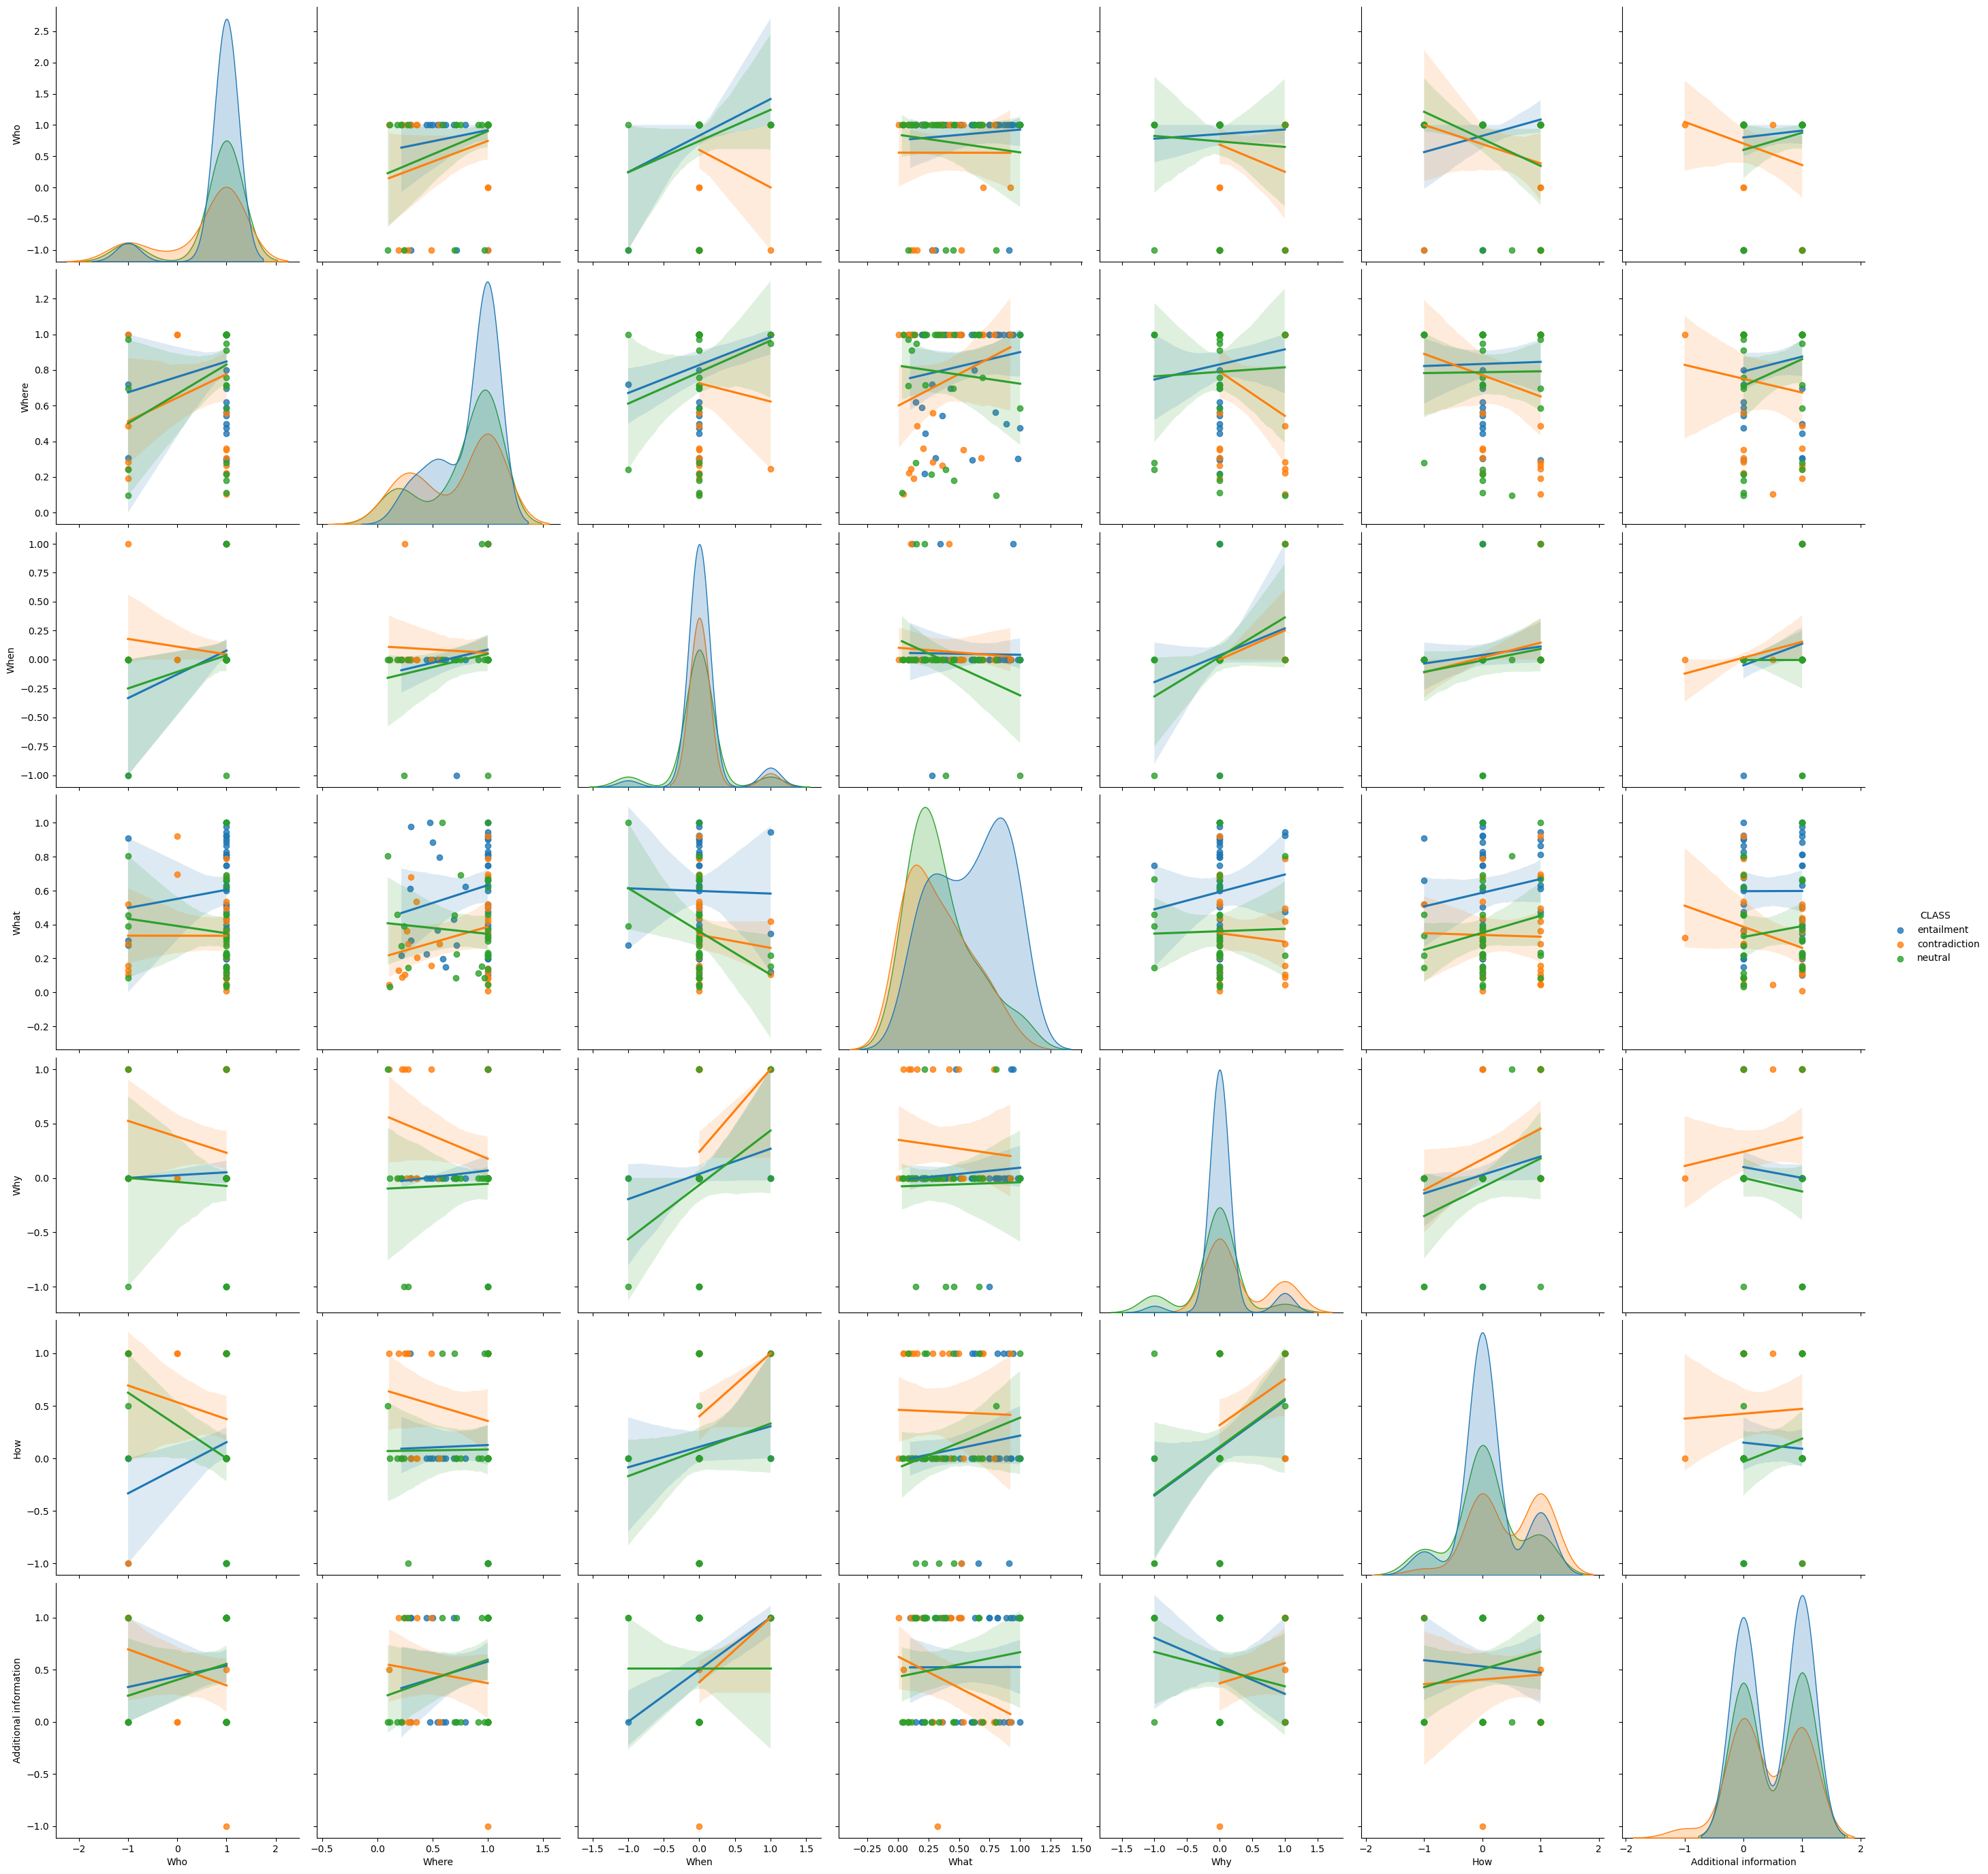

In [233]:
sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=['Who','Where','When','What','Why','How','Additional information'],kind='reg')

In [234]:
dataframe.columns

Index(['CLASS', 'Where', 'What', 'Who', 'When', 'Why', 'How',
       'Additional information'],
      dtype='object')

In [235]:
dataframe.What.describe()

count    100.000000
mean       0.452605
std        0.299054
min        0.008623
25%        0.205522
50%        0.385234
75%        0.687030
max        1.000000
Name: What, dtype: float64

In [236]:
dataframe[dataframe.CLASS=="entailment"].What.describe()

count    42.000000
mean      0.597477
std       0.291494
min       0.099991
25%       0.352726
50%       0.628418
75%       0.857618
max       1.000000
Name: What, dtype: float64

In [237]:
dataframe[dataframe.CLASS=="contradiction"].What.describe()

count    27.000000
mean      0.333963
std       0.257985
min       0.008623
25%       0.112059
50%       0.287660
75%       0.507637
max       0.919731
Name: What, dtype: float64

In [238]:
dataframe[dataframe.CLASS=="neutral"].What.describe()

count    31.000000
mean      0.359661
std       0.265228
min       0.033658
25%       0.182069
50%       0.274580
75%       0.457754
max       1.000000
Name: What, dtype: float64

In [239]:
dataframe[dataframe.CLASS=="contradiction"].Where.describe()

count    27.000000
mean      0.717600
std       0.356291
min       0.104877
25%       0.327499
50%       1.000000
75%       1.000000
max       1.000000
Name: Where, dtype: float64

In [240]:
dataframe[dataframe.CLASS=="neutral"].Where.describe()

count    31.000000
mean      0.787779
std       0.321005
min       0.094228
25%       0.705401
50%       1.000000
75%       1.000000
max       1.000000
Name: Where, dtype: float64

# Correlaciones


In [241]:
dataframe[dataframe["CLASS"]=="entailment"].corr()

,Where,What,Who,When,Why,How,Additional information
Where,1.000000,0.184546,0.175776,0.188770,0.101783,0.022627,0.164986
What,0.184546,1.000000,0.095624,-0.016415,0.108458,0.139829,0.002091
Who,0.175776,0.095624,1.000000,0.346518,0.043315,0.252082,0.105777
When,0.188770,-0.016415,0.346518,1.000000,0.231707,0.119533,0.305257
Why,0.101783,0.108458,0.043315,0.231707,1.000000,0.276420,-0.163796
How,0.022627,0.139829,0.252082,0.119533,0.276420,1.000000,-0.059293
Additional information,0.164986,0.002091,0.105777,0.305257,-0.163796,-0.059293,1.000000


# reglas de inferencia

In [242]:
resultados=[]
for index, strings in dataframe.iterrows():
    print(index+1,strings[0])
    if strings[3]==1.0: # Who
        if strings[7]>0.7: # Aditional information
            if strings[2]>0.27: # What
                if strings[1]>0.5: #where
                    if strings[4]==0.0: # When
                        if strings[5]==0.0: # Why
                            if strings[6]==0.0: # How
                                resultados.append("entailment")
                            else:
                                resultados.append("neutral")
                        else:
                            resultados.append("neutral")
                    else:
                        resultados.append("neutral")
                else:
                    resultados.append("neutral")
            else:
                if strings[1]>0.3: #Where
                    resultados.append("neutral")
                else:
                    if strings[4]==-1: #When
                        resultados.append("neutral")
                    else:
                        if strings[5]==-1: #Why
                            resultados.append("neutral")
                        else:
                            if strings[6]==-1: #How
                                resultados.append("neutral")
                            else:
                                resultados.append("contradiction")
        elif strings[7]==0.0: # Additional information
            if strings[2]>0.34: # What
                if strings[1]>0.3: #Where
                    if strings[4]==0.0: # When
                        if strings[5]==0.0: # Why 
                            if strings[6]==0.0: # How
                                resultados.append("entailment")
                            else:
                                resultados.append("neutral")
                        else:
                            resultados.append("neutral")
                    else:
                        resultados.append("neutral")
                else:
                    resultados.append("neutral")
            else:
                if strings[1]<0.5: #Where
                    resultados.append("contradiction")
                else:
                    resultados.append("neutral")
        else:
            resultados.append("contradiction")
    elif strings[3]==-1.0:
        resultados.append("contradiction")
    else:
        if strings[7]==0.0: # Aditional information
            if strings[2]>0.5: # What
                if strings[4]==0.0: # When
                    if strings[5]==0.0: # Why
                        if strings[6]==0.0: # How
                            resultados.append("contradiction")
                        else:
                            resultados.append("contradiction")
                    else:
                        resultados.append("neutral")
                else:
                    resultados.append("neutral")
            else:
                resultados.append("neutral")
        else:
            resultados.append("contradiction")

1 entailment
2 entailment
3 contradiction
4 contradiction
5 neutral
6 neutral
7 neutral
8 entailment
9 neutral
10 entailment
11 neutral
12 contradiction
13 entailment
14 contradiction
15 neutral
16 neutral
17 entailment
18 contradiction
19 contradiction
20 entailment
21 entailment
22 entailment
23 neutral
24 contradiction
25 entailment
26 neutral
27 entailment
28 entailment
29 entailment
30 neutral
31 neutral
32 contradiction
33 contradiction
34 entailment
35 contradiction
36 neutral
37 entailment
38 neutral
39 neutral
40 entailment
41 neutral
42 neutral
43 contradiction
44 neutral
45 entailment
46 neutral
47 neutral
48 entailment
49 contradiction
50 neutral
51 entailment
52 entailment
53 neutral
54 entailment
55 contradiction
56 entailment
57 entailment
58 neutral
59 neutral
60 neutral
61 neutral
62 neutral
63 neutral
64 entailment
65 entailment
66 contradiction
67 entailment
68 entailment
69 neutral
70 contradiction
71 entailment
72 contradiction
73 contradiction
74 contradiction
75 

In [243]:
len(resultados)

100

In [244]:
gold_label=dataframe.CLASS.values
gold_label

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [245]:
t_entail= list(gold_label).count("entailment")
t_neutral=list(gold_label).count("neutral")
t_contra=list(gold_label).count("contradiction")
print("Entailment:",t_entail)
print("Neutral:",t_neutral)
print("Contradiction:",t_contra)

Entailment: 42
Neutral: 31
Contradiction: 27


In [246]:
len(resultados)

100

In [247]:
aciertos_entail=0
aciertos_neutral=0
aciertos_contra=0
contra_entail=0
contra_neutral=0
entail_contra=0
entail_neutral=0
neutral_entail=0
neutral_contra=0
for i in range(len(gold_label)-1):
    if gold_label[i]==resultados[i]:
        if gold_label[i]=="entailment":
            aciertos_entail+=1
        elif gold_label[i]=="neutral":
            aciertos_neutral+=1
        else:
            aciertos_contra+=1
    else:
        if gold_label[i]=="entailment":
            if resultados[i]=="neutral":
                entail_neutral+=1
            else:
                entail_contra+=1
        elif gold_label[i]=="neutral":
            if resultados[i]=="entail":
                neutral_entail+=1
            else:
                neutral_contra+=1
        else:
            if resultados[i]=="neutral":
                contra_neutral+=1
            else:
                contra_entail+=1

In [248]:
print("Aciertos:",(aciertos_entail+aciertos_contra+aciertos_neutral)/(t_entail+t_contra+t_neutral)," de ",(t_entail+t_contra+t_neutral))
print("Total entail",t_entail," Predict Entail", aciertos_entail, aciertos_entail/t_entail)
print("Total neutral",t_neutral," Predict Neutral", aciertos_neutral, aciertos_neutral/t_neutral)
print("Total contra",t_contra," Predict Contra", aciertos_contra, aciertos_contra/t_contra)
print("Fallas de entailment- predict neutral",entail_neutral)
print("Fallas de entailment- predict contra",entail_contra)
print("Fallas de neutral- predict entail",neutral_entail)
print("Fallas de neutral- predict contra",neutral_contra)
print("Fallas de contra- predict entail",contra_entail)
print("Fallas de contra- predict neutral",contra_neutral)

Aciertos: 0.45  de  100
Total entail 42  Predict Entail 16 0.38095238095238093
Total neutral 31  Predict Neutral 19 0.6129032258064516
Total contra 27  Predict Contra 10 0.37037037037037035
Fallas de entailment- predict neutral 22
Fallas de entailment- predict contra 4
Fallas de neutral- predict entail 0
Fallas de neutral- predict contra 12
Fallas de contra- predict entail 4
Fallas de contra- predict neutral 12
